# Taxi Fare Finder Pro: Total Amount Prediction

# Load data

In [ ]:
#importing initial libraries
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

In [ ]:
#loading data
train = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Exploratory Data Analysis

In [ ]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [ ]:
train.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000,175000,168923.000000,175000.000000,168923.000000,168923,175000.000000,175000.000000,175000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
unique,NaN,109877,109713,NaN,NaN,NaN,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-06-28 18:11:16,2023-06-29 19:08:22,NaN,NaN,NaN,N,NaN,NaN,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8,10,NaN,NaN,NaN,167729,NaN,NaN,135257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.728377,NaN,NaN,1.357678,5.145930,1.518307,NaN,132.710349,132.701429,NaN,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,NaN,NaN,0.891283,394.971052,6.514678,NaN,76.148799,76.192493,NaN,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,NaN,NaN,1.000000,1.080000,1.000000,NaN,67.000000,67.000000,NaN,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,NaN,NaN,1.000000,1.840000,1.000000,NaN,133.000000,133.000000,NaN,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,NaN,NaN,1.000000,3.610000,1.000000,NaN,199.000000,199.000000,NaN,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000


In [ ]:
train.nunique()

VendorID                      3
tpep_pickup_datetime     109877
tpep_dropoff_datetime    109713
passenger_count               9
trip_distance              2929
RatecodeID                    6
store_and_fwd_flag            2
PULocationID                264
DOLocationID                264
payment_type                  5
extra                        28
tip_amount               175000
tolls_amount                214
improvement_surcharge         4
total_amount               8164
congestion_surcharge          3
Airport_fee                   3
dtype: int64

Column information from Kaggle and info:

* total_amount: The total amount paid by the traveler for the taxi ride - target
* VendorID: An identifier for taxi vendors - 0,1,2
* tpep_pickup_datetime and tpep_dropoff_datetime: Timestamps indicating pickup and dropoff times - datetime object
* passenger_count: The number of passengers during the ride
* trip_distance: The distance traveled during the trip
* RatecodeID: Rate code for the ride
* store_and_fwd_flag: A flag indicating whether the trip data was stored and forwarded
* PULocationID and DOLocationID: Pickup and dropoff location identifiers
* payment_type: Payment type used for the ride


Problems:
1. Negative amounts in extra, tolls_amount, improvement_surcharge, congestion_surcharge, Airport_fee and total_amount
2. Some entries have earlier dropoff time than pickup time
3. Null values

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

Test data also has null values

# Preprocessing and feature extraction
1. Datetime shuffle for earlier dropoff than pickup
2. Further analysis for feature extraction from datetime
3. Object dtype columns to numerical-encoding
4. Null values - imputation

## Analysis using train data

In [ ]:
train_for_analysis = train.copy()

## 1. Datetime shuffle for earlier dropoff than pickup

In [ ]:
#convert datetime columns to datetime objects
train_for_analysis['tpep_pickup_datetime'] = pd.to_datetime(train_for_analysis['tpep_pickup_datetime'])
train_for_analysis['tpep_dropoff_datetime'] = pd.to_datetime(train_for_analysis['tpep_dropoff_datetime'])

#newcolumn for checking chronology correctness of pickup and dropoff
train_for_analysis['incorrect_pickup_dropoff'] = (train_for_analysis['tpep_pickup_datetime'] > train_for_analysis['tpep_dropoff_datetime']).astype(int)

#swapping pickup and dropoff times for wrong entries
train_for_analysis['tpep_pickup_datetime_copy'] = train_for_analysis['tpep_pickup_datetime'] #copy to use later
train_for_analysis.loc[train_for_analysis.incorrect_pickup_dropoff == 1,'tpep_pickup_datetime'] = train_for_analysis[train_for_analysis.incorrect_pickup_dropoff==1]['tpep_dropoff_datetime'] #first swap
train_for_analysis.loc[train_for_analysis.incorrect_pickup_dropoff == 1,'tpep_dropoff_datetime'] = train_for_analysis[train_for_analysis.incorrect_pickup_dropoff==1]['tpep_pickup_datetime_copy'] #second swap using previously saved copy
train_for_analysis = train_for_analysis.drop(columns=['tpep_pickup_datetime_copy']) #deleting the copy

In [ ]:
train_for_analysis.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,incorrect_pickup_dropoff
0,1,2023-06-28 16:34:45,2023-06-28 17:20:21,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,1
1,0,2023-06-29 22:01:35,2023-06-29 23:05:01,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,1
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,0


In [ ]:
#check again for incorrect order
train_for_analysis['incorrect_pickup_dropoff_check'] = (train_for_analysis['tpep_pickup_datetime'] > train_for_analysis['tpep_dropoff_datetime']).astype(int)
train_for_analysis['incorrect_pickup_dropoff_check'].unique()

array([0])

## 2. Further analysis for feature extraction from datetime

In [ ]:
#extracting further information from pickup and dropoff datetimes

#travel duration in minutes
train_for_analysis['travel_duration'] = (train_for_analysis['tpep_dropoff_datetime'] - train_for_analysis['tpep_pickup_datetime']).dt.total_seconds()/60
train_for_analysis['travel_duration'] = train_for_analysis['travel_duration'].round(2)

#day of the week (Ref:mon=0;sun=6)
train_for_analysis['pickup_day'] = train_for_analysis['tpep_pickup_datetime'].dt.dayofweek

#time of the day
train_for_analysis['pickup_hour'] = train_for_analysis['tpep_pickup_datetime'].dt.hour
train_for_analysis['time_of_day'] = pd.cut(train_for_analysis['pickup_hour'], bins=[-0.5, 6, 12, 18, 24], labels=['0', '1', '2', '3']) #early morning/midnight, morning, afternoon, evening/night

In [ ]:
train_for_analysis.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,incorrect_pickup_dropoff,incorrect_pickup_dropoff_check,travel_duration,pickup_day,pickup_hour,time_of_day
0,1,2023-06-28 16:34:45,2023-06-28 17:20:21,1.0,2.14,1.0,N,120,9,Credit Card,...,1.0,20.64,2.5,0.0,1,0,45.60,2,16,2
1,0,2023-06-29 22:01:35,2023-06-29 23:05:01,1.0,2.70,1.0,N,15,215,Credit Card,...,1.0,25.55,2.5,0.0,1,0,63.43,3,22,3
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,1.0,17.64,2.5,0.0,0,0,53.65,4,10,1
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,1.0,12.80,2.5,0.0,0,0,56.87,3,13,2
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,1.0,18.00,2.5,0.0,0,0,18.83,3,22,3


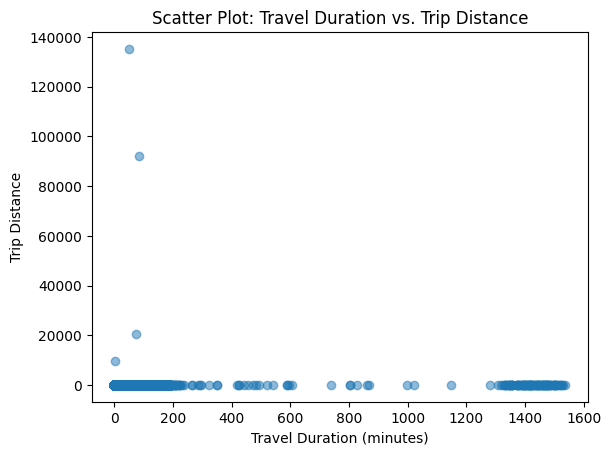

In [ ]:
# Scatter plot for duration vs distance
plt.scatter(train_for_analysis['travel_duration'], train_for_analysis['trip_distance'], alpha=0.5)

# Set labels and title
plt.xlabel('Travel Duration (minutes)')
plt.ylabel('Trip Distance')
plt.title('Scatter Plot: Travel Duration vs. Trip Distance')

# Show the plot
plt.show()

Travel duration and trip distance are expected to be directly proportional but the above graph doesnt reflect so. So the only information to be taken from pickup and dropoff times are day of the week and time of the day.

In [ ]:
train_for_analysis = train_for_analysis.drop(columns = ['incorrect_pickup_dropoff', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour']) #dropping copy and extra columns that are not needed anymore

In [ ]:
train_for_analysis.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,incorrect_pickup_dropoff_check,travel_duration,pickup_day,time_of_day
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,0,45.60,2,2
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,0,63.43,3,3
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,0,53.65,4,1
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,0,56.87,3,2
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,0,18.83,3,3


### Pipeline for datetime feature

In [ ]:
def datetime_clean(df):
  #convert datetime columns to datetime objects
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

  #newcolumn for checking chronology correctness of pickup and dropoff
  df['incorrect_pickup_dropoff'] = (df['tpep_pickup_datetime'] > df['tpep_dropoff_datetime']).astype(int)

  #swapping pickup and dropoff times for wrong entries
  df['tpep_pickup_datetime_copy'] = df['tpep_pickup_datetime'] #copy to use later
  df.loc[df.incorrect_pickup_dropoff == 1,'tpep_pickup_datetime'] = df[df.incorrect_pickup_dropoff==1]['tpep_dropoff_datetime'] #first swap
  df.loc[df.incorrect_pickup_dropoff == 1,'tpep_dropoff_datetime'] = df[df.incorrect_pickup_dropoff==1]['tpep_pickup_datetime_copy'] #second swap using previously saved copy
  df = df.drop(columns = ['tpep_pickup_datetime_copy', 'incorrect_pickup_dropoff']) #dropping copy and extra columns that are not needed anymore

  #extracting further information from pickup and dropoff datetimes
  #day of the week (Ref:mon=0;sun=6)
  df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

  #time of the day
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
  df['time_of_day'] = pd.cut(df['pickup_hour'], bins=[-0.5, 6, 12, 18, 24], labels=['0', '1', '2', '3']) #early morning/midnight, morning, afternoon, evening/night
  df = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour'])

  return df

## 3. Encoding

In [ ]:
def encoding(df):
  df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y': 1, 'N': 0})
  df['payment_type'] = df['payment_type'].replace({'Credit Card': 1, 'Cash': 2, 'Wallet': 3, 'UPI': 4, 'unknown': 0})
  return df

In [ ]:
train_for_analysis = encoding(train_for_analysis)
train_for_analysis.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,incorrect_pickup_dropoff_check,travel_duration,pickup_day,time_of_day
0,1,1.0,2.14,1.0,0.0,120,9,1,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,0,45.60,2,2
1,0,1.0,2.70,1.0,0.0,15,215,1,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,0,63.43,3,3
2,1,1.0,1.15,1.0,0.0,167,223,1,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,0,53.65,4,1
3,0,1.0,0.40,1.0,0.0,128,239,1,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,0,56.87,3,2
4,1,3.0,1.10,1.0,0.0,203,52,1,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,0,18.83,3,3


## 4. Null values - imputation

In [ ]:
train.isnull().sum() #null values

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [ ]:
test.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [ ]:
null_columns = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'Airport_fee']
#check for unique values in above listed columns
for i in null_columns:
  print(i, train[i].unique())

passenger_count [ 1.  3.  0.  2. nan  4.  6.  5.  8.  9.]
RatecodeID [ 1. 99.  3. nan  2.  5.  4.]
store_and_fwd_flag ['N' nan 'Y']
congestion_surcharge [ 2.5  0.   nan -2.5]
Airport_fee [ 0.    1.75   nan -1.75]


In [ ]:
#impute using SimpleImputer
from sklearn.impute import SimpleImputer
def impute_df(df):
  mean_imputer = SimpleImputer(strategy='mean')
  most_freq_imputer = SimpleImputer(strategy='most_frequent')
  #passenger_count - mean
  df['passenger_count'] = mean_imputer.fit_transform(df[['passenger_count']])
  #RatecodeID - mean
  df['RatecodeID'] = mean_imputer.fit_transform(df[['RatecodeID']])
  #store_and_fwd_flag - most frequent
  df['store_and_fwd_flag'] = most_freq_imputer.fit_transform(df[['store_and_fwd_flag']])
  #congestion_surcharge - mean
  df['congestion_surcharge'] = mean_imputer.fit_transform(df[['congestion_surcharge']])
  #Airport_fee - mean
  df['Airport_fee'] = mean_imputer.fit_transform(df[['Airport_fee']])
  return df

In [ ]:
train_for_analysis = impute_df(train_for_analysis)
train_for_analysis.isnull().sum()

VendorID                          0
passenger_count                   0
trip_distance                     0
RatecodeID                        0
store_and_fwd_flag                0
PULocationID                      0
DOLocationID                      0
payment_type                      0
extra                             0
tip_amount                        0
tolls_amount                      0
improvement_surcharge             0
total_amount                      0
congestion_surcharge              0
Airport_fee                       0
incorrect_pickup_dropoff_check    0
travel_duration                   0
pickup_day                        0
time_of_day                       0
dtype: int64

# Pipleline

1. Preprocessing
2. Model

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def create_full_pipeline(model):
  #functions for transformers
  impute_transformer = FunctionTransformer(impute_df)
  datetime_transformer = FunctionTransformer(datetime_clean)
  encode_transformer = FunctionTransformer(encoding)
  scaler = StandardScaler()

  #preprocess_pipeline
  preprocess_pipeline = Pipeline(steps=[('datetime_clean', datetime_transformer),
                                        ('encode', encode_transformer), ('impute', impute_transformer), ('scale', scaler)])

  #model_pipeline
  model_pipeline = Pipeline(steps=[('linear regression model', model)])
  #combine preprocessing pipeline and model pipeline
  full_pipeline = make_pipeline(preprocess_pipeline, model_pipeline)
  return full_pipeline

# Train data

1. Train data split into features and target
2. Train and validation data

In [ ]:
x = train.drop(columns=['total_amount'])
y = train['total_amount']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=33)

# Models

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

## Dummy - baseline

In [ ]:
#baseline model - mean
mean_model = DummyRegressor(strategy='mean').fit(xtrain, ytrain)
ypred_mean = mean_model.predict(xtest)
r2 = r2_score(ytest, ypred_mean)
print("R2 score(baseline model mean): {:.2f}".format(r2))

R2 score(baseline model mean): -0.00


## Linear Regression

In [ ]:
#Linear Regression
lr = LinearRegression()
full_pipeline_lr = create_full_pipeline(lr)

xtrain_transformed_lr = full_pipeline_lr.fit(xtrain, ytrain)
ypred_lr = full_pipeline_lr.predict(xtest)
r2 = r2_score(ytest, ypred_lr)
print("R2 score(Linear Regression): {:.2f}".format(r2))

R2 score(Linear Regression): 0.72


In [ ]:
xtrain_transformed_lr

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('datetime_clean',
                                  FunctionTransformer(func=<function datetime_clean at 0x7bae72d71e10>)),
                                 ('encode',
                                  FunctionTransformer(func=<function encoding at 0x7bae72a715a0>)),
                                 ('impute',
                                  FunctionTransformer(func=<function impute_df at 0x7bae749caf80>)),
                                 ('scale', StandardScaler())])),
                ('pipeline-2',
                 Pipeline(steps=[('linear regression model',
                                  LinearRegression())]))])

In [ ]:
#Cross validation
cv_scores_lr = cross_val_score(full_pipeline_lr, x, y, cv=5, scoring='r2')
print("Cross-validated R2 scores(Linear Regression): {}".format(cv_scores_lr))
print("Mean R2 score(Linear Regression): {:.2f}".format(np.mean(cv_scores_lr)))

Cross-validated R2 scores(Linear Regression): [0.69965584 0.73257144 0.73689863 0.71450077 0.72751634]
Mean R2 score(Linear Regression): 0.72


## KNeighbors

In [ ]:
#KNeighbors Regressor
knn = KNeighborsRegressor()
full_pipeline_knn = create_full_pipeline(knn)

xtrain_transformed_knn = full_pipeline_knn.fit(xtrain, ytrain)
ypred_knn = full_pipeline_knn.predict(xtest)
r2_knn = r2_score(ytest, ypred_knn)
print("R2 score(K-Nearest Neighbors Regressor): {:.2f}".format(r2_knn))

R2 score(K-Nearest Neighbors Regressor): 0.77


In [ ]:
cv_scores_knn = cross_val_score(full_pipeline_knn, x, y, cv=5, scoring='r2')
print("Cross-validated R2 scores(K-Nearest Neighbors Regressor): {}".format(cv_scores_knn))
print("Mean R2 score(K-Nearest Neighbors Regressor): {:.2f}".format(np.mean(cv_scores_knn)))

Cross-validated R2 scores(K-Nearest Neighbors Regressor): [0.74831862 0.76612587 0.76403908 0.74306616 0.76052037]
Mean R2 score(K-Nearest Neighbors Regressor): 0.76


## Decision Tree

In [ ]:
#Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
full_pipeline_dt = create_full_pipeline(decision_tree)

xtrain_transformed_dt = full_pipeline_dt.fit(xtrain, ytrain)
ypred_dt = full_pipeline_dt.predict(xtest)
r2_dt = r2_score(ytest, ypred_dt)
print("R2 score(Decision Tree Regressor): {:.2f}".format(r2_dt))

R2 score(Decision Tree Regressor): 0.90


In [ ]:
cv_scores_dt = cross_val_score(full_pipeline_dt, x, y, cv=5, scoring='r2')
print("Cross-validated R2 scores(Decision Tree Regressor): {}".format(cv_scores_dt))
print("Mean R2 score(Decision Tree Regressor): {:.2f}".format(np.mean(cv_scores_dt)))

Cross-validated R2 scores(Decision Tree Regressor): [0.88917201 0.90212748 0.91721916 0.90941246 0.88039675]
Mean R2 score(Decision Tree Regressor): 0.90


## Adaboost with decision tree

In [ ]:
#AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(estimator = decision_tree, n_estimators = 100, random_state = 33)
full_pipeline_adaboost = create_full_pipeline(adaboost_regressor)

xtrain_transformed_adaboost = full_pipeline_adaboost.fit(xtrain, ytrain)
ypred_adaboost = full_pipeline_adaboost.predict(xtest)
r2_adaboost = r2_score(ytest, ypred_adaboost)
print("R2 score(AdaBoost with Decision Tree Regressor): {:.2f}".format(r2_adaboost))

R2 score(AdaBoost with Decision Tree Regressor): 0.95


## Gradient Boosting Regressor

In [ ]:
#Gradient Boosting Regressor
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 33)
full_pipeline_gb = create_full_pipeline(gradient_boosting_regressor)

xtrain_transformed_gb = full_pipeline_gb.fit(xtrain, ytrain)
ypred_gb = full_pipeline_gb.predict(xtest)
r2_gb = r2_score(ytest, ypred_gb)
print("R2 score(Gradient Boosting Regressor): {:.2f}".format(r2_gb))

R2 score(Gradient Boosting Regressor): 0.94


## Random Forest Regressor

In [ ]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state = 33)
full_pipeline_rf = create_full_pipeline(rf)

xtrain_transformed_rf = full_pipeline_rf.fit(xtrain, ytrain)
ypred_rf = full_pipeline_rf.predict(xtest)
r2_rf = r2_score(ytest, ypred_rf)
print("R2 score(Random Forest Regressor): {:.2f}".format(r2_rf))

R2 score(Random Forest Regressor): 0.95


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 33,
 'verbose': 0,
 'warm_start': False}

### Multi Layer Perceptron

In [ ]:
# MLP Regressor
mlp_regressor = MLPRegressor(max_iter = 200, random_state = 33)
full_pipeline_mlp = create_full_pipeline(mlp_regressor)

xtrain_transformed_mlp = full_pipeline_mlp.fit(xtrain, ytrain)
ypred_mlp = full_pipeline_mlp.predict(xtest)
r2_mlp = r2_score(ytest, ypred_mlp)
print("R2 score(MLP Regressor): {:.2f}".format(r2_mlp))

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 score(MLP Regressor): 0.93


## Hyperparameter tuning
1. Random forest
2. Adaboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### 1. Random Forest

In [ ]:
#random forest

#pipeline - rf
#functions for transformers
impute_transformer = FunctionTransformer(impute_df)
datetime_transformer = FunctionTransformer(datetime_clean)
encode_transformer = FunctionTransformer(encoding)
scaler = StandardScaler()
rf_tuning = Pipeline(steps=[('datetime_clean', datetime_transformer),
                            ('encode', encode_transformer), ('impute', impute_transformer), ('scale', scaler),
                            ('rf', rf)])

param_grid_rf = {
    'rf__n_estimators': randint(10, 200),
    'rf__max_features': randint(3,8),
    'rf__max_depth': randint(10,30),
    'rf__min_samples_split': randint(2, 11),
    'rf__min_samples_leaf': randint(1, 11)
}

random_rf = RandomizedSearchCV(rf_tuning, param_distributions = param_grid_rf,
                                      n_iter = 10, cv = 5, scoring = 'r2', random_state = 33)

In [ ]:
#fit using best model
random_rf.fit(xtrain, ytrain)
#get params
best_rf_model = random_rf.best_estimator_
best_rf_params = random_rf.best_params_
print("Best hyperparameters for RF:", best_rf_params)

#predict
ypred_rf_tuned = random_rf.predict(xtest)

#R2 score
r2_rf_tuned = r2_score(ytest, ypred_rf_tuned)
print("R2 score(Random Forest Regressor - Tuned): {:.2f}".format(r2_rf_tuned))

Best hyperparameters for RF: {'rf__max_depth': 21, 'rf__max_features': 7, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 3, 'rf__n_estimators': 46}
R2 score(Random Forest Regressor - Tuned): 0.95


### 2. Adaboost

In [ ]:
# Adaboost

#pipeline - ada
#functions for transformers
impute_transformer = FunctionTransformer(impute_df)
datetime_transformer = FunctionTransformer(datetime_clean)
encode_transformer = FunctionTransformer(encoding)
scaler = StandardScaler()
ada = AdaBoostRegressor()
ada_tuning = Pipeline(steps=[('datetime_clean', datetime_transformer),
                            ('encode', encode_transformer), ('impute', impute_transformer), ('scale', scaler),
                            ('ada', ada)])

param_grid_ada = {
    'ada__n_estimators': randint(10, 200),
    'ada__learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

random_ada = RandomizedSearchCV(ada_tuning, param_distributions = param_grid_ada,
                                      n_iter = 10, cv = 5, scoring = 'r2', random_state = 33)

In [ ]:
#fit using best model
random_ada.fit(xtrain, ytrain)

#get params
best_ada_model = random_ada.best_estimator_
best_ada_params = random_ada.best_params_
print("Best hyperparameters for Adaboost:", best_ada_params)

#predict
ypred_ada_tuned = random_ada.predict(xtest)

#R2 score
r2_ada_tuned = r2_score(ytest, ypred_ada_tuned)
print("R2 score(Adaboost - Tuned): {:.2f}".format(r2_ada_tuned))

Best hyperparameters for Adaboost: {'ada__learning_rate': 0.01, 'ada__n_estimators': 76}
R2 score(Adaboost - Tuned): 0.77


# Final test data

In [ ]:
test.head()

In [ ]:
#one - random forest(0.95) #tuned
ypred_ftest = random_rf.predict(test)
rf_ypred = pd.DataFrame({'total_amount': ypred_ftest})
rf_ypred['ID'] = range(1, len(rf_ypred) + 1)
rf_ypred.to_csv('predictions_rf_tuned.csv', index=False)

In [ ]:
#two - adaboost(0.95) #untuned
ypred_ftest_ada = full_pipeline_adaboost.predict(test)
ada_ypred = pd.DataFrame({'total_amount': ypred_ftest_ada})
ada_ypred['ID'] = range(1, len(ada_ypred) + 1)
ada_ypred.to_csv('predictions_ada.csv', index=False)

In [ ]:
#three - gradientboosting(0.94) #untuned
ypred_ftest_gb = full_pipeline_gb.predict(test)
gb_ypred = pd.DataFrame({'total_amount': ypred_ftest_gb})
gb_ypred['ID'] = range(1, len(gb_ypred) + 1)
gb_ypred.to_csv('predictions_gb.csv', index=False)

In [ ]:
#four - mlp(0.93) #untuned
ypred_ftest_mlp = full_pipeline_mlp.predict(test)
mlp_ypred = pd.DataFrame({'total_amount': ypred_ftest_mlp})
mlp_ypred['ID'] = range(1, len(mlp_ypred) + 1)
mlp_ypred.to_csv('predictions_mlp.csv', index=False)

In [ ]:
#five - random forest(0.95) #untuned
ypred_ftest = full_pipeline_rf.predict(test)
rf_ypred = pd.DataFrame({'total_amount': ypred_ftest})
rf_ypred['ID'] = range(1, len(rf_ypred) + 1)
rf_ypred.to_csv('predictions_rf_untuned.csv', index=False)

# Summary & Insights

Data Preprocessing:

- Addressed issues like earlier dropoff time than pickup and missing values using appropriate strategies
- Extracted useful features from datetime columns(day of the week and time of day)

Models(R2 score in brackets)
1. Baseline Model - Dummy Regressor(mean) -  (0.00)
2. Linear Regression(0.72)
3. KNeighbors Regressor(0.76)
4. Gradient Boosting Regressor(0.94)
5. Multilayer Perceptron Regressor(0.93)
4. Tree-based models:
    - Decision Tree(0.90)
    - Random Forest(0.95)
    - AdaBoost with Decision Trees(0.95)

Random Forest and AdaBoost showed highest performance among the models, so hyperparameter tuning was done on them. Random Forest maintained its performance while Adaboost did not(primarily because of it being expensive in terms of computational power and time).

Final test predictions was hence done with Random Forest(tuned), Adaboost, Gradient Boosting and MLPRegressor.

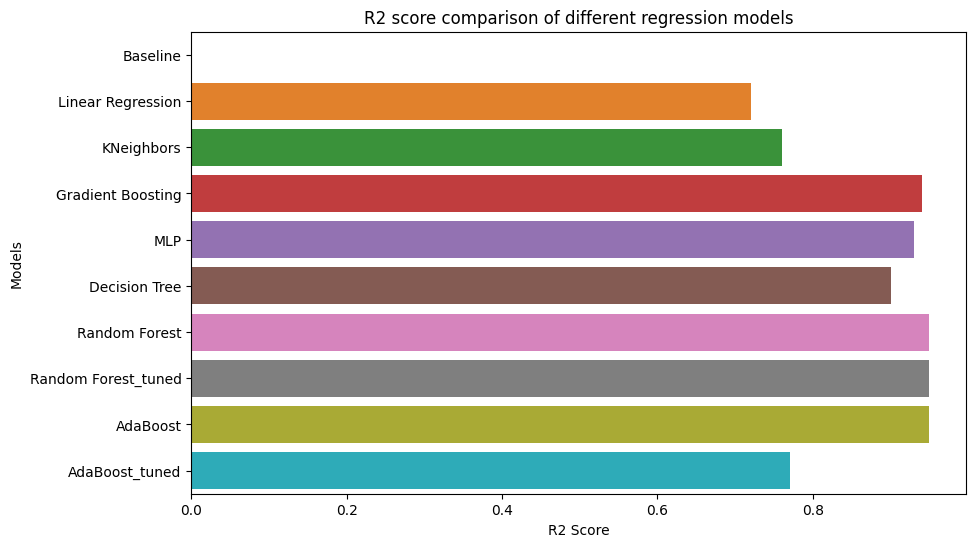

In [ ]:
#df for scores
models = ['Baseline', 'Linear Regression', 'KNeighbors', 'Gradient Boosting', 'MLP', 'Decision Tree', 'Random Forest', 'Random Forest_tuned', 'AdaBoost', 'AdaBoost_tuned']
scores = [0.00, 0.72, 0.76, 0.94, 0.93, 0.90, 0.95, 0.95, 0.95, 0.77]
scores_df = pd.DataFrame({'Models': models, 'R2 Score': scores})

#plot for score insights
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='R2 Score', y='Models', data=scores_df)

plt.title('R2 score comparison of different regression models')
plt.xlabel('R2 Score')
plt.ylabel('Models')

plt.show()